{C_1: (Omegas_i*Rs_i**3*Rs_o - Omegas_i*Rs_i**3*ls_o - Omegas_o*Rs_i*Rs_o**3 - Omegas_o*Rs_o**3*ls_i)/(Rs_i**3*Rs_o - Rs_i**3*ls_o - Rs_i**2*Rs_o*ls_i + Rs_i**2*ls_i*ls_o - Rs_i*Rs_o**3 - Rs_i*Rs_o**2*ls_o - Rs_o**3*ls_i - Rs_o**2*ls_i*ls_o), C_2: (-Omegas_i*Rs_i**3*Rs_o**3 - Omegas_i*Rs_i**3*Rs_o**2*ls_o + Omegas_o*Rs_i**3*Rs_o**3 - Omegas_o*Rs_i**2*Rs_o**3*ls_i)/(Rs_i**3*Rs_o - Rs_i**3*ls_o - Rs_i**2*Rs_o*ls_i + Rs_i**2*ls_i*ls_o - Rs_i*Rs_o**3 - Rs_i*Rs_o**2*ls_o - Rs_o**3*ls_i - Rs_o**2*ls_i*ls_o)}


(0.05, 0.5)

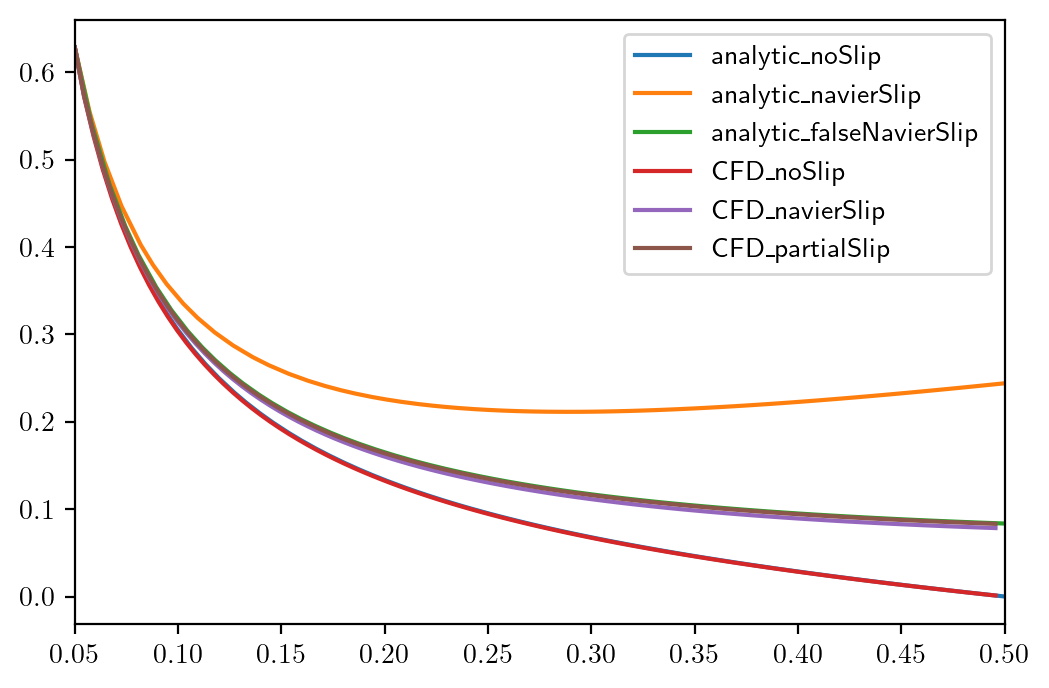

In [18]:
import sympy as sym
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.dpi"] = 200
rcParams["text.usetex"] = True

#symbolic derivation of analytical solutions
C_1=sym.Symbol('C_1') 
C_2=sym.Symbol('C_2') 
Omegas_i=sym.Symbol('Omegas_i') 
Omegas_o=sym.Symbol('Omegas_o') 
rs=sym.Symbol('rs') 
Rs_o=sym.Symbol('Rs_o') 
Rs_i=sym.Symbol('Rs_i') 
ls_i=sym.Symbol('ls_i') 
ls_o=sym.Symbol('ls_o') 
u=C_1*rs+C_2/rs
u_tmp1=sym.simplify(rs*sym.diff(u/rs,rs))
u_tmp2=sym.simplify(sym.diff(u,rs))
########## navierSlip
eqns1=[u.subs(rs,Rs_i)-ls_i*u_tmp1.subs(rs,Rs_i)-Omegas_i*Rs_i , u.subs(rs,Rs_o)+ls_o*u_tmp1.subs(rs,Rs_o)-Omegas_o*Rs_o]
solution1=sym.simplify(sym.solve(eqns1,(C_1,C_2)))
u1=sym.simplify(u.subs([(C_1,solution1[C_1]),(C_2,solution1[C_2])]))
#print(solution1)

########## falseNavierSlip
eqns2=[u.subs(rs,Rs_i)-ls_i*u_tmp2.subs(rs,Rs_i)-Omegas_i*Rs_i , u.subs(rs,Rs_o)+ls_o*u_tmp2.subs(rs,Rs_o)-Omegas_o*Rs_o]
solution2=sym.simplify(sym.solve(eqns2,(C_1,C_2)))
u2=sym.simplify(u.subs([(C_1,solution2[C_1]),(C_2,solution2[C_2])]))
print(solution2)



#parameters
R_i=0.05
R_o=0.5
l_i=0
l_o=1
Omega_i=12.566
Omega_o=0

#compute analytical solutions (noSlip,navierSlip,falseNavierSlip)
u_ns=u1.subs([(Rs_i,R_i),(Rs_o,R_o),(ls_i,0),(ls_o,0),(Omegas_i,Omega_i),(Omegas_o,Omega_o)])
u1=u1.subs([(Rs_i,R_i),(Rs_o,R_o),(ls_i,l_i),(ls_o,l_o),(Omegas_i,Omega_i),(Omegas_o,Omega_o)])
u2=u2.subs([(Rs_i,R_i),(Rs_o,R_o),(ls_i,l_i),(ls_o,l_o),(Omegas_i,Omega_i),(Omegas_o,Omega_o)])


#import CFD results
CFDnoSlip = pd.read_csv("noSlip.csv")
CFDnavierSlip = pd.read_csv("navierSlip.csv")
CFDpartialSlip = pd.read_csv("partialSlip.csv")


#plotting
p=sym.plot(u_ns,u1,u2,(rs,R_i,R_o),show=False,legend = True)
p[0].line_color = 'black'
p[0].label = 'analytic_noSlip'
p[1].line_color = 'blue'
p[1].label = 'analytic_navierSlip'
p[2].line_color = 'red'
p[2].label = 'analytic_falseNavierSlip'


ptsNoS = p[0].get_points()
ptsNaS = p[1].get_points()
ptsFNS = p[2].get_points()

    
plt.plot(ptsNoS[0],ptsNoS[1],label="analytic_noSlip")
plt.plot(ptsNaS[0],ptsNaS[1],label="analytic_navierSlip")
plt.plot(ptsFNS[0],ptsFNS[1],label="analytic_falseNavierSlip")

plt.plot(CFDnoSlip["Points_0"],CFDnoSlip["U_1"],label="CFD_noSlip")
plt.plot(CFDnavierSlip["Points_0"],CFDnavierSlip["U_1"],label="CFD_navierSlip")
plt.plot(CFDpartialSlip["Points_0"],CFDpartialSlip["U_1"],label="CFD_partialSlip")
#plt.grid()
plt.legend()
plt.xlim([R_i,R_o])



In [16]:
import sympy as sym
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.dpi"] = 200
rcParams["text.usetex"] = True

#symbolic derivation of analytical solutions
C_1=sym.Symbol('C_1') 
C_2=sym.Symbol('C_2') 
Omega_1=sym.Symbol('Omega_1') 
Omega_2=sym.Symbol('Omega_2') 
r=sym.Symbol('r') 
R_2=sym.Symbol('R_2') 
R_1=sym.Symbol('R_1') 
lambda_1=sym.Symbol('lambda_1') 
lambda_2=sym.Symbol('lambda_2') 
u=C_1*r+C_2/r
u_tmp1=sym.simplify(r*sym.diff(u/r,r))
u_tmp2=sym.simplify(sym.diff(u,r))
########## navierSlip
eqns1=[u.subs(r,R_1)-lambda_1*u_tmp1.subs(r,R_1)-Omega_1*R_1 , u.subs(r,R_2)+lambda_2*u_tmp1.subs(r,R_2)-Omega_2*R_2]
solution1=sym.simplify(sym.solve(eqns1,(C_1,C_2)))
u1=sym.simplify(u.subs([(C_1,solution1[C_1]),(C_2,solution1[C_2])]))
#print(solution1)

########## falseNavierSlip
eqns2=[u.subs(r,R_1)-lambda_1*u_tmp2.subs(r,R_1)-Omega_1*R_1 , u.subs(r,R_2)+lambda_2*u_tmp2.subs(r,R_2)-Omega_2*R_2]
solution2=sym.simplify(sym.solve(eqns2,(C_1,C_2)))
u2=sym.simplify(u.subs([(C_1,solution2[C_1]),(C_2,solution2[C_2])]))
print(solution2)



{C_1: (Omega_1*R_1**3*R_2 - Omega_1*R_1**3*lambda_2 - Omega_2*R_1*R_2**3 - Omega_2*R_2**3*lambda_1)/(R_1**3*R_2 - R_1**3*lambda_2 - R_1**2*R_2*lambda_1 + R_1**2*lambda_1*lambda_2 - R_1*R_2**3 - R_1*R_2**2*lambda_2 - R_2**3*lambda_1 - R_2**2*lambda_1*lambda_2), C_2: (-Omega_1*R_1**3*R_2**3 - Omega_1*R_1**3*R_2**2*lambda_2 + Omega_2*R_1**3*R_2**3 - Omega_2*R_1**2*R_2**3*lambda_1)/(R_1**3*R_2 - R_1**3*lambda_2 - R_1**2*R_2*lambda_1 + R_1**2*lambda_1*lambda_2 - R_1*R_2**3 - R_1*R_2**2*lambda_2 - R_2**3*lambda_1 - R_2**2*lambda_1*lambda_2)}
